In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **Supervised ML Classification Course Project | Heart Disease Prediction**
![image.png](https://static.vecteezy.com/system/resources/previews/018/244/237/original/3d-illustration-of-heart-disease-warning-png.png)

**In this Project we will cover following sections**
* **Main Objectiive**
* **Description and summary of the Dataset**
* **Data Cleaning and feature engineering**
* **Model building**
* **Analyzing the best model**
* **Key findings and insights**
* **Conclusion**

* ## <font color=#dd3558> Main objective


Patients were classified as having or not having heart disease based on cardiac catheterization, the gold standard. If they had more than 50% narrowing of a coronary artery they were labeled as having heart disease.

Its diagnoses is important, which includes analysis of various factors that are present in the dataset used in this project.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

* ## <font color=#dd3558> Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

* ## <font color=#dd3558> Description of the Dataset

 **About the data:**
* This dataset contains all physical and clinical parameters to determine Heart disease. There are a total of 13 parameters. 
* This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.
* It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.
* The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [3]:
# Data retrieving
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* ## <font color=#dd3558> Preprocessing
    
**Steps involved in Data Preprocessing:**
* Dropping the repeated features
* Encoding categorical variables (dtype objects)
* Dealing with missing values 

In [4]:
# Visualisation Preferences
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [5]:
# Extract Descriptive Data.
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


target
1    526
0    499
Name: count, dtype: int64


<Axes: title={'center': 'Heart Disease Counts'}, xlabel='target'>

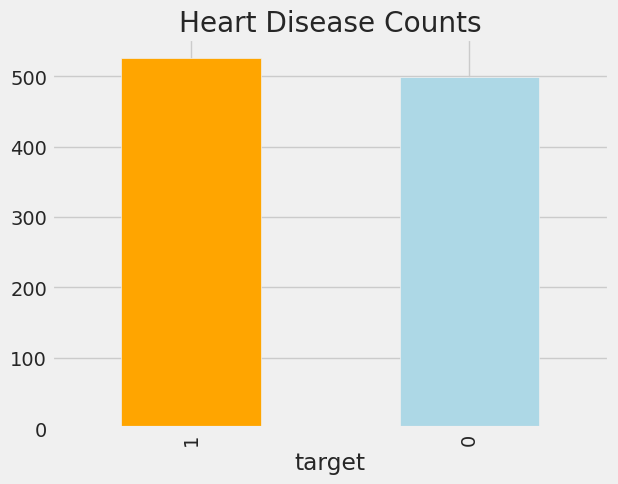

In [6]:
#Viewing the status of people in the data set : 
print(df.target.value_counts())
df.target.value_counts().plot(kind="bar", color=["orange", "lightblue"], title = 'Heart Disease Counts')

In [7]:
# Check for Null Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

* ## <font color=#dd3558> Exploratory Data Analysis
    
**Steps involved:**
* Studying correlations between features 
* Patterns of most significant features

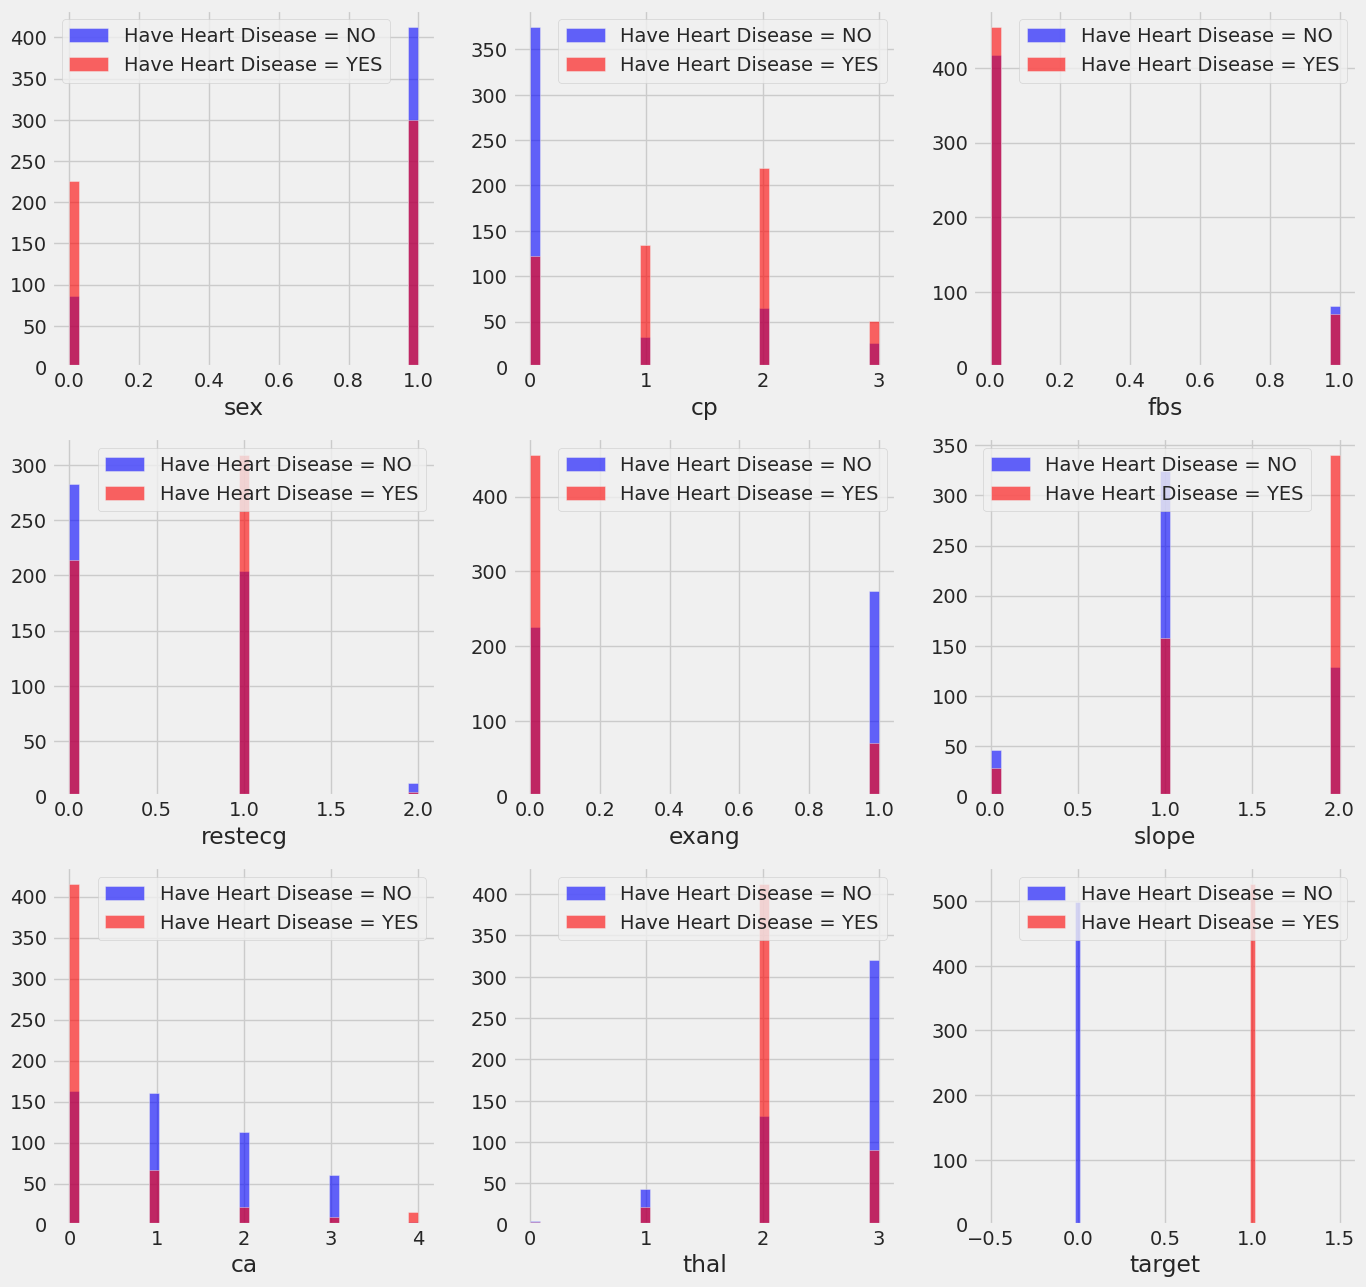

In [9]:
#Study of the relationship of categorical features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

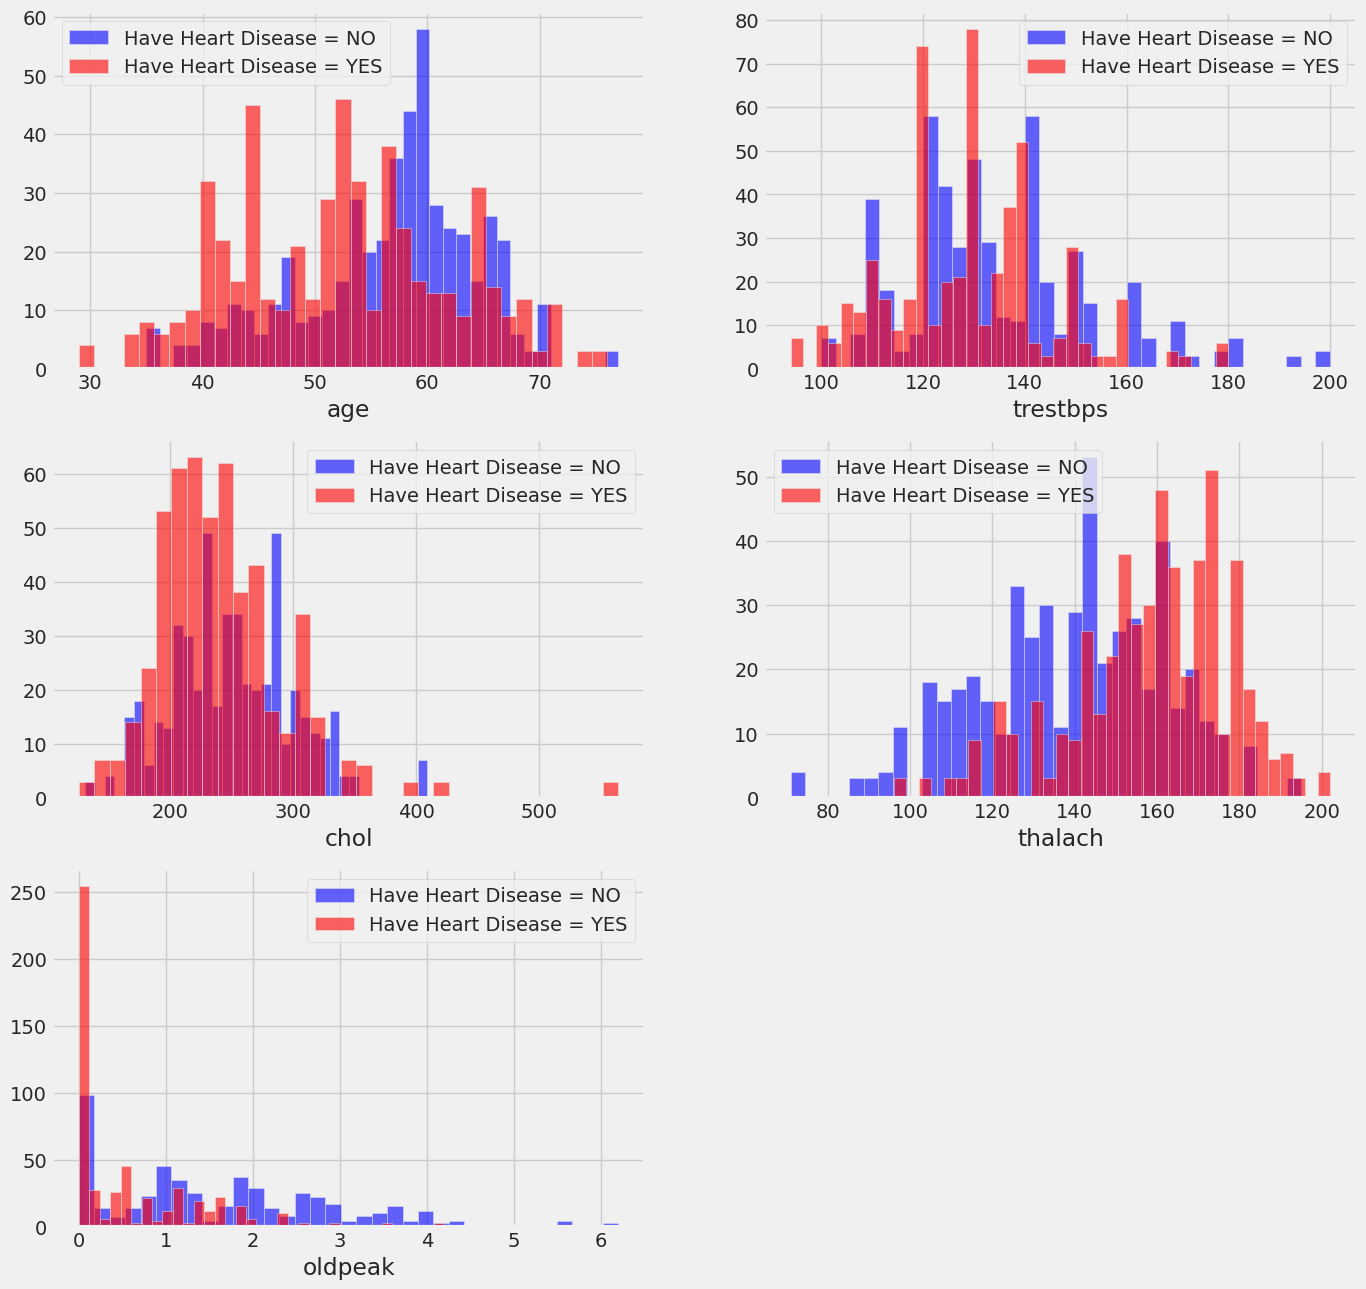

In [10]:
#Study of the relationship of continuous features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

(14.5, -0.5)

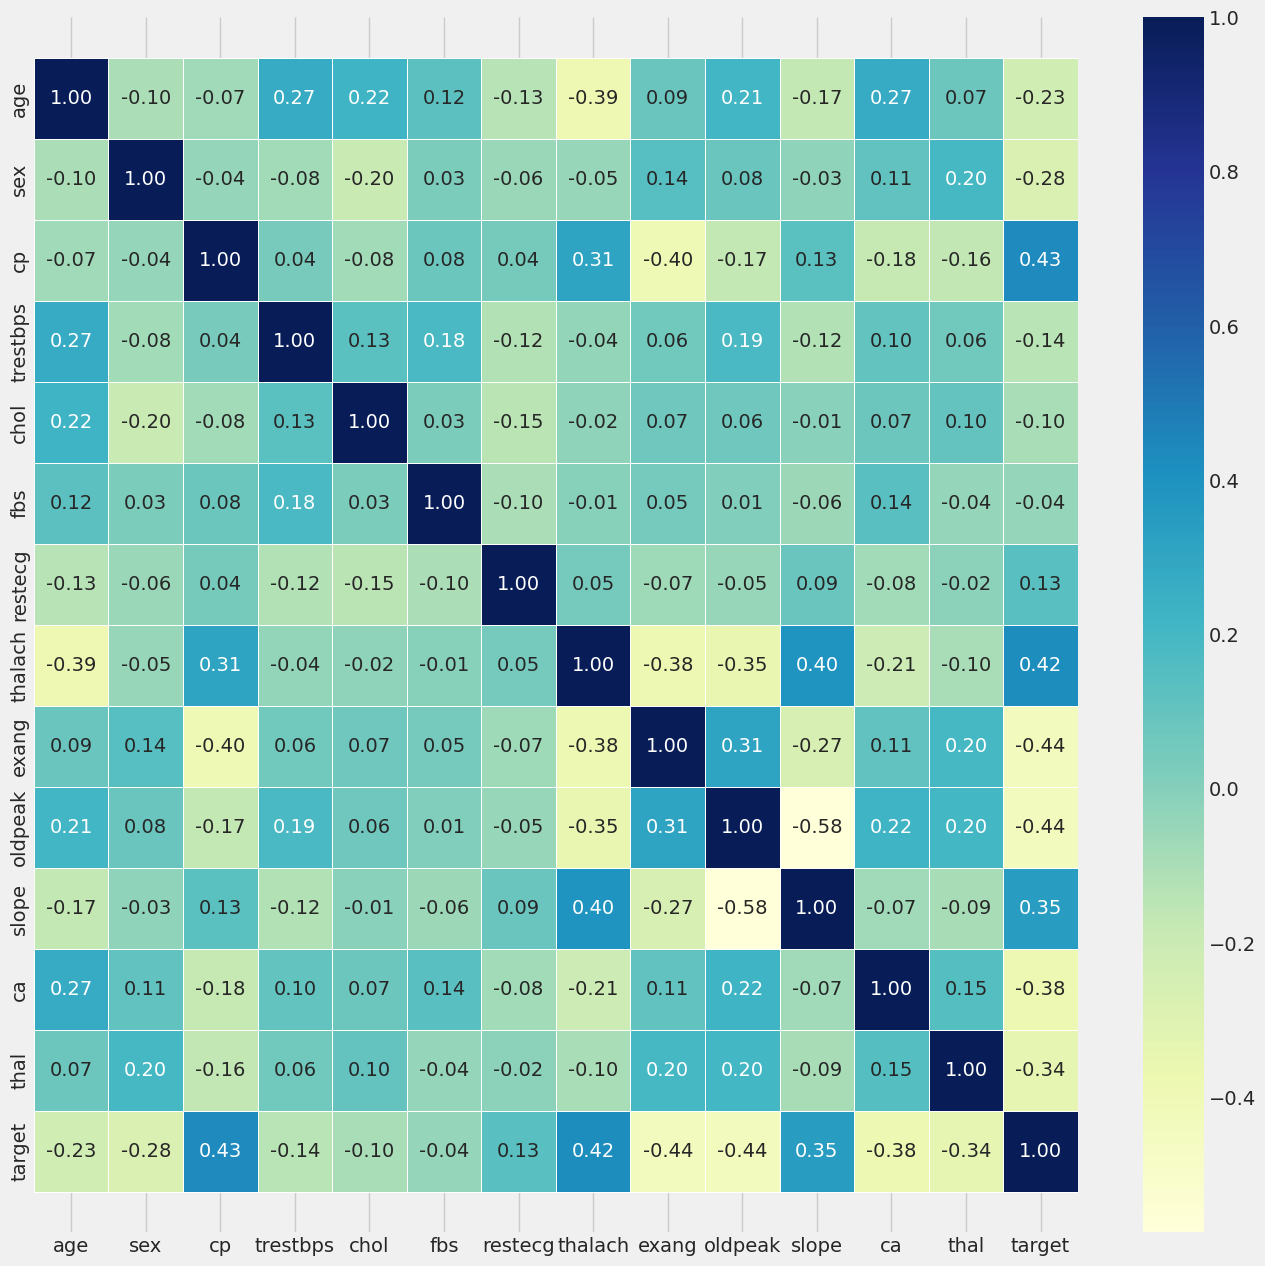

In [11]:
# Studying the correlations between features using Heat Map!
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

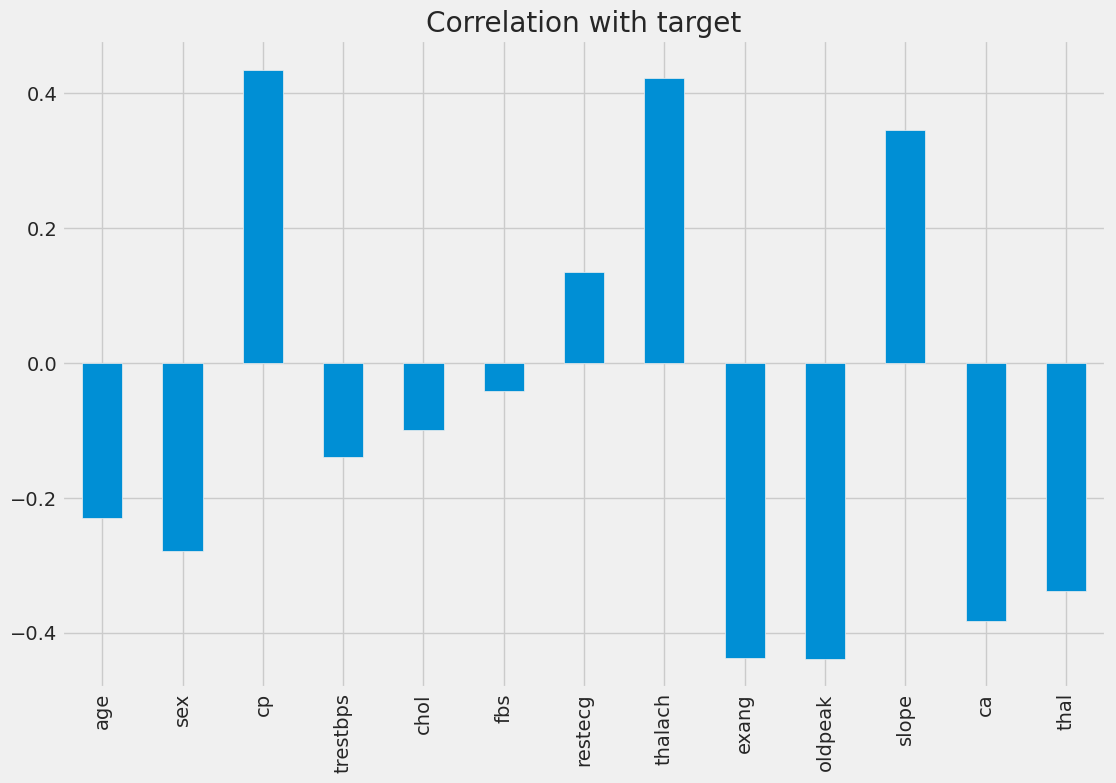

In [12]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [13]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [14]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.16,0.48,-0.83,0.26,1.73,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.72,0.76,-1.40,-1.05,1.30,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.72,0.94,-0.83,0.52,-0.91,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.83,0.36,0.93,-1.87,0.71,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.50,0.48,-0.48,0.65,-0.91,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
1021,0.61,-0.38,0.23,-0.35,1.47,0,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
1022,-0.82,-1.23,0.56,-1.35,-0.06,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1023,-0.49,-1.23,0.16,0.43,-0.91,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


## Machine Learning Section 

### 1- Logistic Regression Algorithm

In [15]:
feature_cols = [col_name for col_name in dataset.columns if col_name != 'target']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(dataset[feature_cols], dataset.target))
# Create the dataframes
X_train = dataset.loc[train_idx, feature_cols]
y_train = dataset.loc[train_idx, 'target']

X_test  = dataset.loc[test_idx, feature_cols]
y_test  = dataset.loc[test_idx, 'target']

In [16]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.87,0.87,0.87,0.87,0.87
recall,0.87,0.88,0.87,0.87,0.87
f1-score,0.87,0.88,0.87,0.87,0.87
support,150.00,158.00,0.87,308.00,308.00


In [17]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.87,0.86,0.86,0.86,0.86
recall,0.85,0.88,0.86,0.86,0.86
f1-score,0.86,0.87,0.86,0.86,0.86
support,150.00,158.00,0.86,308.00,308.00


In [18]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.87,0.87,0.87,0.87,0.87
recall,0.87,0.88,0.87,0.87,0.87
f1-score,0.87,0.88,0.87,0.87,0.87
support,150.00,158.00,0.87,308.00,308.00


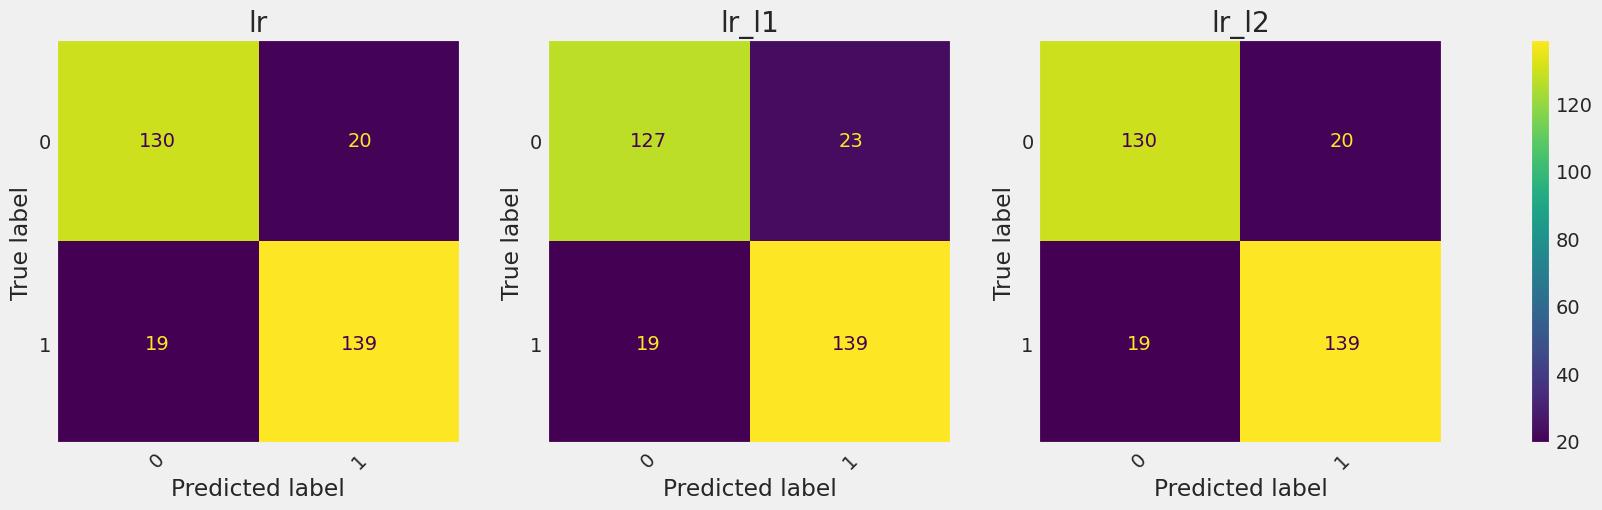

In [19]:
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

**Conclusion :**
* Three variants of Logistic regression performed equally well.
* Standard and L2 having accuracy of 87% and L1 having accuracy of 86%

### 2- KNN Algorithm

In [20]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K            1.00
Error Rate   0.00
Name: 0, dtype: float64

In [21]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.98,1.00,0.99,0.99,0.99
recall,1.00,0.98,0.99,0.99,0.99
f1-score,0.99,0.99,0.99,0.99,0.99
support,150.00,158.00,0.99,308.00,308.00


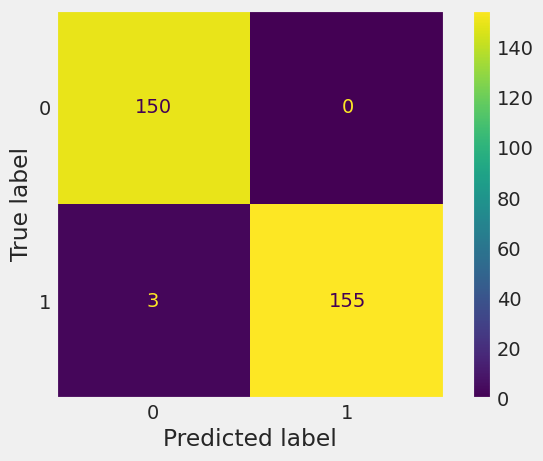

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

**Conclusion :**
* KNN performed better than all the variants of Logistic regression
* It gave precision of 0.98 for class '0' and 1.00 class '1'.

### 3- SVC Algorthim

In [23]:
kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)

SVC_cl = svc.fit(X_train, y_train)
y_pred = SVC_cl.predict(X_test)
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
SVC_cl_report

,0,1,accuracy,macro avg,weighted avg
precision,0.92,0.94,0.93,0.93,0.93
recall,0.94,0.92,0.93,0.93,0.93
f1-score,0.93,0.93,0.93,0.93,0.93
support,150.00,158.00,0.93,308.00,308.00


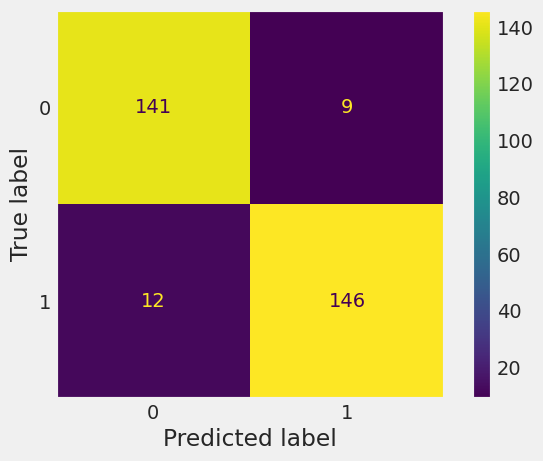

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

**Conclusion :**
* SVC performance was not as good as KNN but accuracy was acceptable with 93%.
* Overall, KNN gave the best results from the different machine learning algorithms used here.